In [1]:
import pandas as pd
import numpy as np; np.random.seed(8)
from numpy.polynomial.polynomial import polyfit
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns; sns.set(color_codes=True)

import plotly.plotly as py
import plotly.tools as tls

import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# overview
## Objective
- I got some fifa 2018 Data from the Kaggle site, with this I decided to check it out and see what are the players being paid occording to. So i decided to take a few days to work on this, I basically want to work with the regression (both linear and Multiple) and also make a model based on the Data.  
### Geting the DataFrame
###  identify variables
### clean data 
- make sure data is int. or floats 
- check for null values.
### describe
- Describe()
- where is the data coming from
- how many observations
### graphs 
- Histograms (destributions) 
- scatter plots (for outliars) (relationships)
- plot together  (graphs)
-check the heat image graph
- pairplots
### Transform variables
- if the relationship is linear.
- normalise
-regression (run)
- interprete the P values
- interprete the strength
- conclude (interprete overall)

### lets figure out what the we have and what we need to fix before.

In [2]:
fifa = pd.read_csv('CompleteDataset.csv')
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

### Our fifa data above shows that we have uneven counts of null values per column, this is widely caused by the fact that Goal keepers play one position and one position only, so the other played positions are irrelevant to them, cuasing Nan values on the table dataframe.


### so to fix this we will have to remove all the prefered positions for all players as for now the data in these columns is irrelevant to our goal. This will help us instead of dropping all the goal keepers' rows we will only remove none useful columns for now.

In [3]:
pos = fifa[['CAM','CB','CDM','CF','CM','ID','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB','RAM','RB','RCB','RCM','RDM','RF','RM','RS','RW','RWB','ST']] 
pos.head()

,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Why remove columns?
* we have some rows in the dataframe that are having missing values.
* the columns do not represent the everyone in the dataframe.
* the columns do not have values for Goalkeepers.
* the columns that we remove are close to irrelivent to what our objectives are.

#  clean data
## lets clean the dataframe by removing columns with Nan values

In [4]:
'''lets use drop() to remove all the irrelevant columns'''

fifap = fifa.drop(columns=pos)
fifap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 48 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

### lets remove columns that are not useful and alocate to a new clean dataframe.
* we remove these columns simply because we want a clean clear dataframe
* sfifa (new dataframe)

In [5]:
sfifa=fifap.drop(columns="Unnamed: 0")
sfifa.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,55,25,11,61,44,10,83,70,11,GK


### Check Values

- In order to predict Wage of the players we will need to check and/or use the columns with continous Values like 'Age' and the values can be floats..
- We need to remove all the special characters (currency signs) from Continous values and also turn them into floats.
- so, for this section I removed all character signs under values and just having floats on the coulumns Value and Wage 

In [6]:
sfifa['Value'].head()

0    €95.5M
1     €105M
2     €123M
3      €97M
4      €61M
Name: Value, dtype: object

In [7]:
def singi(string):
    if string[-1] == 'K':
        return float(string[1:-1])*1000
    elif string[-1] == 'M':
        return float(string[1:-1])*1000000
    else:
        return float(string[1:])

In [8]:
sfifa['Value']= [singi(value) for value in sfifa['Value']]
sfifa['Wage'] = [singi(value) for value in sfifa['Wage']]

## removing Zeros.
#### I check and we had a few players that didn't have Wage and the pattern on this is that all the players with zero Wage Have Zero on Value. this brought up a concern meaning that the players infomation was either not present or the players really played for no payment, after that hard thought, I could come up with a few solutions and it was that:
1. I leave the Values as is.
2. Replace the Zeroes with 1
3. drop all of the values and Wage with Zeroes.

#### I thought that itwas probably unecessary to to keep these values since we don't really understand what they mean for us.


In [9]:
#select smaller data set
# define the data/predictors as the pre-set feature names
csfifa = sfifa[['Value','Wage','Potential', 'Sprint speed','Aggression','Free kick accuracy','Overall','Age']]

#examine null values
#lets remove Rows with the values = 0 
cfifa = csfifa[(csfifa['Value'] != 0) & (csfifa['Wage'] != 0)]
cfifa[['Value','Wage']].min()

Value    10000.0
Wage      1000.0
dtype: float64

### Special Characters 
- I found some of the values on some columns on the smaller dataset have special characters like (+  and -) which I unfortunately couldn't find what they represent because the matadata on the fifa18 was unavailable on kaggle. 
- I needed to remove the characters and anything ofter them and deal with the dataset as is.

In [10]:
def removeExtraChars(string):
   sc = "" #special character: either '+' or '-'
   if "+" in string:
       sc = "+"
   elif "-" in string:
       sc = "-"
   else:
       return int(string)
   return int(string[:string.find(sc)])

def cleanUpColumn(df, column):
   return [removeExtraChars(str(row)) for row in df[column]]



In [11]:
cfifa['Sprint speed'] = cleanUpColumn(cfifa, 'Sprint speed')
cfifa['Aggression'] = cleanUpColumn(cfifa, 'Aggression')
cfifa['Free kick accuracy'] = cleanUpColumn(cfifa, 'Free kick accuracy')


## wage and age
plot to see if  Age determines the  Wage of the players

* after removing the the characters currencies on the Values and Wages columns we plotted a bar graph checking the  checking the if this can be properly destributed with floats instead for strings.
- and as seen wages has floats and can be interprented by the python script. 

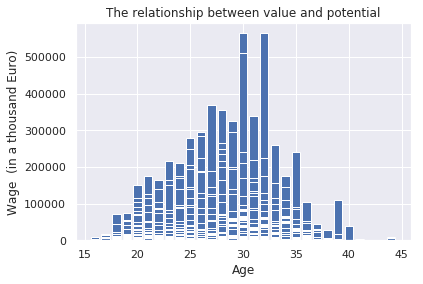

In [12]:
y = cfifa['Wage']
x = cfifa['Age']

plt.title("The relationship between value and potential")
plt.xlabel('Age')
plt.ylabel('Wage  (in a thousand Euro)')
plt.bar(x,y)

plt.show()

In [13]:
cfifa['Wage'].max()

565000.0

* with the exception of the two outliers (Ronaldo and Messi), the graph shows that players from the age of 24 to 35 get more more wage. this mist be caused by the aggression and potential these players have at this youthfull age range. 

### Value and Potential

In [14]:
# calculate Pearson's correlation coefficient 
x = cfifa['Potential']
y = cfifa['Value']

#std of potentetnial 
stdP = np.std(cfifa['Potential'])
print("standard deviation of Potential is",stdP)

#std of Value 
stdV = np.std(cfifa['Value'])
print("standard deviation of Value is",stdV)

standard deviation of Potential is 6.101004183291239
standard deviation of Value is 5384609.003852888


In [15]:
# calculate Pearson's correlation coefficient 
vary = cfifa['Value']
varx = cfifa['Potential']
#equation below gives nan values as results

slope, intercept, r, p, std_err = stats.linregress(varx,vary)
slope

521952.24242669594

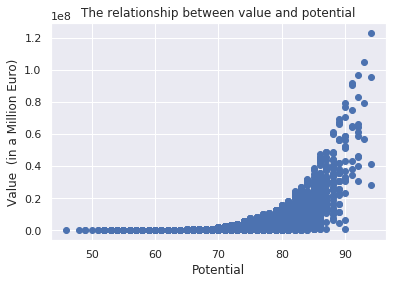

In [16]:
#plot a scatter betwwen Potential and Value to see the reltionship.

y = cfifa['Value']
x = cfifa['Potential']

plt.title("The relationship between value and potential")
plt.xlabel('Potential')
plt.ylabel('Value  (in a Million Euro)')
plt.scatter(x,y)

plt.show()

- Although the values on 'Value' has floats and has replaced the characters of the numbers. The destribution of the scatter obove is not linear and is a little harder to interprete the plot. so for this to be simplisised we will have to transform the 'Value' column digits for it to fit simply and for it to be interpreted properly.

## Transform DATA
### lets go back to "value and potentialon", we will normalise on column with large numbers.
* NB. we do this so we can find a better representation of the whole graph that makes a little better sense, we also are working in the linear reg. so we need our erroe line to be straight and not bent (exponential). 

In [17]:
# we are going to transform 'values' on this particular representation.
val=np.log(cfifa['Value'])
val.head()

0    18.374637
1    18.469471
2    18.627695
3    18.390222
4    17.926384
Name: Value, dtype: float64

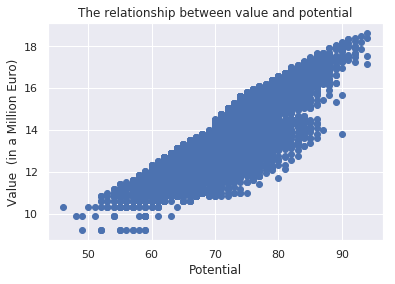

In [18]:
#plot a scatter betwwen Potential and Value to see the reltionship.

y = val
x = cfifa['Potential']

plt.title("The relationship between value and potential")
plt.xlabel('Potential')
plt.ylabel('Value  (in a Million Euro)')
plt.scatter(x,y)

plt.show()

* After tranforming the Values columns to make make it better fit for regresstion. this changes the form of our plot to have linear relationships without affect the Value.

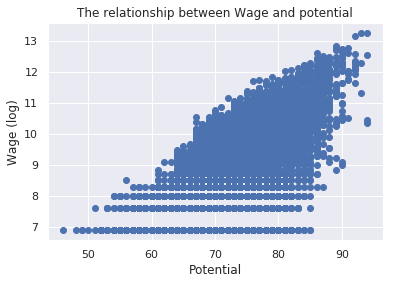

In [19]:
#histograms and scatterplots
#min, max, average

y= np.log(cfifa['Wage'])
x = cfifa['Potential']

plt.title("The relationship between Wage and potential")
plt.xlabel('Potential')
plt.ylabel('Wage (log)')
plt.scatter(x,y)

plt.show()

### relationship between Wage and Potential.
* r - A strong uphill (positive) linear relationship
* p - is the probability of finding the observed, or more extreme, results when the null hypothesis of a study question is true .
* std_err - accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates.
* slope - represents the rate of change in y as x changes. Because y is dependent on x, the slope describes the predicted values of y given x.
* Intercept - is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value.

In [30]:
y= np.log(cfifa['Wage'])
x = cfifa['Potential']

slope, intercept, r, p, std_err = stats.linregress(x,y)

print(r)

0.6362959934573127


## the correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. The value of r is always between +1 and –1. 

### A Perfect destribution. 
* the perfect destribution is the one that the graph is equally destributed in the. the graph is not suposed too be left or right scewed in any way, although it might mean something on its own.
* a perfect example is the histogram showing the destribution of potential below.

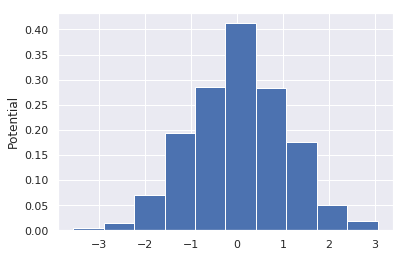

In [21]:
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=10)
plt.ylabel('Potential');

# multiple regression
* is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable).

#### R - SQUARED
* R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

In [37]:
#multiple regression
# get all of the predictor variable in one dataframe without the outcome variable
#df = pd.DataFrame(data.data, columns=data.feature_names)
predict = cfifa[['Value','Potential','Sprint speed','Aggression','Free kick accuracy','Overall','Age']]

# Put the target (log of wage) in another DataFrame
#target = pd.DataFrame(data.target, columns=["logWage"])
target = np.log(cfifa['Wage'])
#specify variables
X = predict #predictor variables
y = target #outcome

#fit model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

#get predicted y values
predictions = lm.predict(X)

#get R squared
print(lm.score(X,y))

0.6804114425326503


In [34]:
#see regression coefficients
print(lm.coef_)

[ 2.17341522e-08  2.68626967e-02 -1.09084682e-04  8.95144321e-04
  3.18613233e-03  1.17820953e-01 -2.78673954e-04]


In [36]:
print(lm.intercept_)

-1.4728796637580874


In [23]:
#get regression diagnostics

#E.g. get average difference between observed Y and predicted Y
#get scatterplot of predicted Y vs residuals